## Técnica Bagging

In [61]:
#importando pacotes
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

Para realizar a explicação da técnica Bagging iremos construir um Data Frame muito simples e explicar passo a passo.

In [62]:
# Criar o DataFrame
data = {
    'id_cliente': range(1, 11),
    'sexo': ['M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'tempo_de_emprego': [2, 5, 3, 7, 4, 8, 6, 3, 10, 1],
    'renda': [2500, 3000, 2800, 4000, 3200, 4500, 3100, 2900, 5000, 2000]
}

df = pd.DataFrame(data)
df.head(11)

,id_cliente,sexo,tempo_de_emprego,renda
0,1,M,2,2500
1,2,F,5,3000
2,3,F,3,2800
3,4,M,7,4000
4,5,F,4,3200
5,6,M,8,4500
6,7,F,6,3100
7,8,M,3,2900
8,9,F,10,5000
9,10,M,1,2000


Acima podemos visualizar o simples df que construímos. Agora, o que precisamos fazer é criar amostras com reposição desse dataframe. Para essa criação utilizaremos o resample, como queremos três amostras, ele irá repetir e selecionar de forma aleatória os elementos desse nosso df de forma a criar como se fossem 3 novos dataframes utilizando os dados do original. 

Vamos iniciar então essa parte da técnica que rebece o nome de Boosting. 

obs: iremos ajustar a coluna sex para binária, visto que é o mais adequado tanto para o bossting quanto para os modelos que serão criados posteriormente.

In [63]:
# Codificar a coluna 'sexo' para variáveis numéricas
df['sexo'] = df['sexo'].map({'M': 0, 'F': 1})

Agora daremos início ao Boosting:

In [64]:
# Separar as independentes do nosso alvo, ou seja, nossa variável dependente.
X = df[['sexo', 'tempo_de_emprego']]
y = df['renda']  # A variável dependente agora é 'renda'

In [65]:
# Número de amostras bootstrap
n_samples = 3
bootstrap_samples = []

for i in range(n_samples):
    # Gerar amostra bootstrap
    X_resampled, y_resampled = resample(X, y, random_state=i)
    
    # Armazenar a amostra e o alvo correspondente
    bootstrap_samples.append((X_resampled, y_resampled))
    
    # Exibir a amostra
    print(f"Amostra Bootstrap {i + 1}")
    print(pd.DataFrame(X_resampled, columns=['sexo', 'tempo_de_emprego']).reset_index(drop=True))
    print(pd.DataFrame({'renda': y_resampled}).reset_index(drop=True))
    print()

Amostra Bootstrap 1
   sexo  tempo_de_emprego
0     0                 8
1     0                 2
2     0                 7
3     0                 7
4     0                 3
5     0                 1
6     0                 7
7     0                 8
8     1                 3
9     1                 4
   renda
0   4500
1   2500
2   4000
3   4000
4   2900
5   2000
6   4000
7   4500
8   2800
9   3200

Amostra Bootstrap 2
   sexo  tempo_de_emprego
0     0                 8
1     1                10
2     0                 1
3     0                 8
4     0                 2
5     0                 2
6     1                 5
7     0                 3
8     1                 6
9     0                 1
   renda
0   4500
1   5000
2   2000
3   4500
4   2500
5   2500
6   3000
7   2900
8   3100
9   2000

Amostra Bootstrap 3
   sexo  tempo_de_emprego
0     1                10
1     1                10
2     1                 6
3     1                 3
4     1                10
5     0     

Finalizada a nossa primeira etapa da técnica Bagging, obtivemos as 3 amostras feitas a partir do nosso dataframe. Agora, para darmos sequência, precisamos realizar a segunda etapa, chamada de 'base learners', que nada mais é que a criação de um modelo diferente para cada uma das amostras obtidas na etapa acima.

Aqui iremos utilizar três modelos, serão eles árvore de decisão, regressão linear e random forest. E, para cada um desses modelos iremos adicionar uma coluna ao nosso df original com a previsão que esse modelo fez para cada linha da nossa variável renda. 

### Modelo 1 - amostra 1 - Árvore de decisão:

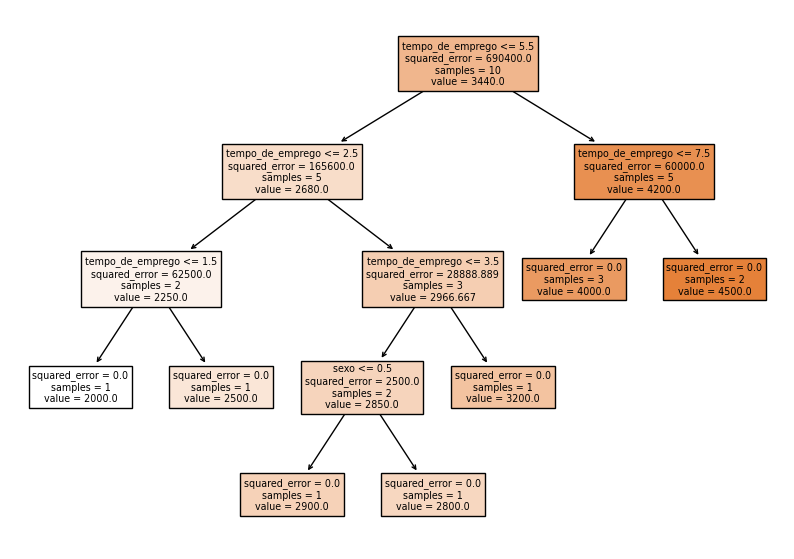

In [66]:
# Selecionar a primeira amostra bootstrap
X_first, y_first = bootstrap_samples[0]

# Criar e treinar a árvore de decisão
regressor = DecisionTreeRegressor()
regressor.fit(X_first, y_first)

# Fazer previsões com a primeira amostra.
y_pred = regressor.predict(X_first)

# Visualizar a árvore de decisão
plt.figure(figsize=(10, 7))
tree.plot_tree(regressor, feature_names=['sexo', 'tempo_de_emprego'], filled=True)
plt.show()

In [67]:
# Fazer previsões para o DataFrame original
df['renda_sugerida_arvore'] = regressor.predict(X[['sexo', 'tempo_de_emprego']])

# Exibir a tabela com a renda sugerida
print("Tabela com a renda sugerida para cada linha do DataFrame:")
print(df[['id_cliente', 'sexo', 'tempo_de_emprego', 'renda', 'renda_sugerida_arvore']])

Tabela com a renda sugerida para cada linha do DataFrame:
   id_cliente  sexo  tempo_de_emprego  renda  renda_sugerida_arvore
0           1     0                 2   2500                 2500.0
1           2     1                 5   3000                 3200.0
2           3     1                 3   2800                 2800.0
3           4     0                 7   4000                 4000.0
4           5     1                 4   3200                 3200.0
5           6     0                 8   4500                 4500.0
6           7     1                 6   3100                 4000.0
7           8     0                 3   2900                 2900.0
8           9     1                10   5000                 4500.0
9          10     0                 1   2000                 2000.0


### Modelo 2- amostra 2- Regressão linear:

In [68]:
# Selecionar a segunda amostra bootstrap
X_second, y_second = bootstrap_samples[1]

# Criar e treinar o modelo de regressão linear com a segunda amostra bootstrap
regressor = LinearRegression()
regressor.fit(X_second, y_second)

# Fazer previsões para o DataFrame original
df['renda_sugerida_regressao_linear'] = regressor.predict(X[['sexo', 'tempo_de_emprego']])

# Exibir a tabela com a renda sugerida pela regressão linear
print("Tabela com a renda sugerida pela regressão linear para cada linha do DataFrame:")
print(df[['id_cliente', 'sexo', 'tempo_de_emprego', 'renda', 'renda_sugerida_regressao_linear']])

Tabela com a renda sugerida pela regressão linear para cada linha do DataFrame:
   id_cliente  sexo  tempo_de_emprego  renda  renda_sugerida_regressao_linear
0           1     0                 2   2500                      2416.932271
1           2     1                 5   3000                      2976.095618
2           3     1                 3   2800                      2252.191235
3           4     0                 7   4000                      4226.693227
4           5     1                 4   3200                      2614.143426
5           6     0                 8   4500                      4588.645418
6           7     1                 6   3100                      3338.047809
7           8     0                 3   2900                      2778.884462
8           9     1                10   5000                      4785.856574
9          10     0                 1   2000                      2054.980080


### Modelo 3- amostra 3- RandomForest:

In [69]:
# Selecionar a terceira amostra bootstrap
X_third, y_third = bootstrap_samples[2]

# Criar e treinar o modelo Random Forest com a terceira amostra bootstrap
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_third, y_third)

# Fazer previsões para o DataFrame original
df['renda_sugerida_random_forest'] = regressor.predict(X[['sexo', 'tempo_de_emprego']])

# Exibir a tabela com a renda sugerida pelo Random Forest
print("Tabela com a renda sugerida pelo Random Forest para cada linha do DataFrame:")
print(df[['id_cliente', 'sexo', 'tempo_de_emprego', 'renda', 'renda_sugerida_random_forest']])

Tabela com a renda sugerida pelo Random Forest para cada linha do DataFrame:
   id_cliente  sexo  tempo_de_emprego  renda  renda_sugerida_random_forest
0           1     0                 2   2500                        2891.0
1           2     1                 5   3000                        3035.0
2           3     1                 3   2800                        2818.0
3           4     0                 7   4000                        3404.0
4           5     1                 4   3200                        3052.0
5           6     0                 8   4500                        4321.0
6           7     1                 6   3100                        3149.0
7           8     0                 3   2900                        2891.0
8           9     1                10   5000                        4937.0
9          10     0                 1   2000                        2891.0


Agora que foram criados os três modelos, de forma muito modesta, sem as métricas de avaliação, por se tratar de um simples exemplo, vamos verificar como ficou nosso df após adicionar a renda sugerida pelas previsões:

In [75]:
df

,id_cliente,sexo,tempo_de_emprego,renda,renda_sugerida_arvore,renda_sugerida_regressao_linear,renda_sugerida_random_forest,média_das_previsões
0,1,0,2,2500,2500.0,2416.932271,2891.0,2602.644090
1,2,1,5,3000,3200.0,2976.095618,3035.0,3070.365206
2,3,1,3,2800,2800.0,2252.191235,2818.0,2623.397078
3,4,0,7,4000,4000.0,4226.693227,3404.0,3876.897742
4,5,1,4,3200,3200.0,2614.143426,3052.0,2955.381142
5,6,0,8,4500,4500.0,4588.645418,4321.0,4469.881806
6,7,1,6,3100,4000.0,3338.047809,3149.0,3495.682603
7,8,0,3,2900,2900.0,2778.884462,2891.0,2856.628154
8,9,1,10,5000,4500.0,4785.856574,4937.0,4740.952191
9,10,0,1,2000,2000.0,2054.980080,2891.0,2315.326693


Agora que a segunda etapa desta técnica está concluída, vamos para a realização da última etapa, chamada de Aggregating, que é a seleção de uma média ou maior frequência dos resultados dos três modelos juntos. Portanto, vamos aqui, por se tratar de valores contínuos e não boleanos, realizar uma média da renda predita. 

In [72]:
#cálculo da média das previsões:
df['média_das_previsões'] = df[['renda_sugerida_arvore', 'renda_sugerida_regressao_linear', 'renda_sugerida_random_forest']].mean(axis=1)

Visualização do nosso dataframe final, aonde podemos visualizar a conclusão, de forma simples, da técnica de Bagging. Temos aqui as variáveis independentes ao lado da dependente e por fim, a média da previsão realizada por 3 modelos diferentes:

In [74]:
df_1= df[['id_cliente', 'sexo', 'tempo_de_emprego', 'renda', 'média_das_previsões']]
df_1.head(11)

,id_cliente,sexo,tempo_de_emprego,renda,média_das_previsões
0,1,0,2,2500,2602.644090
1,2,1,5,3000,3070.365206
2,3,1,3,2800,2623.397078
3,4,0,7,4000,3876.897742
4,5,1,4,3200,2955.381142
5,6,0,8,4500,4469.881806
6,7,1,6,3100,3495.682603
7,8,0,3,2900,2856.628154
8,9,1,10,5000,4740.952191
9,10,0,1,2000,2315.326693
